In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('F:\Stock Market Prediction\INFY.NS.csv', index_col=0,parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,0.794921,0.796679,0.791015,0.796679,0.517830,204800.0
1996-01-02,0.794921,0.798828,0.793457,0.793457,0.515736,204800.0
1996-01-03,0.798828,0.798828,0.798828,0.798828,0.519227,102400.0
1996-01-04,0.791015,0.794921,0.791015,0.793554,0.515799,307200.0
1996-01-05,0.784179,0.784179,0.784179,0.784179,0.509705,51200.0


In [38]:
df.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-06,1602.800049,1620.150024,1576.000000,1617.550049,1617.550049,6420684.0
2024-03-07,1616.599976,1628.449951,1604.199951,1616.449951,1616.449951,6348359.0


In [39]:
df.shape

(7092, 6)

In [40]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7085.000000,7085.000000,7085.000000,7085.000000,7085.000000,7.085000e+03
mean,418.098390,422.650474,413.346315,418.003935,360.850287,1.454412e+07
std,456.917124,460.940515,452.639772,456.816897,440.350531,1.570462e+07
min,0.763183,0.765625,0.712890,0.763183,0.496058,0.000000e+00
25%,78.901566,80.375000,77.218750,78.730469,53.115662,5.688951e+06
50%,281.500000,284.600006,277.893738,281.981262,207.580826,8.933802e+06
75%,542.474976,548.250000,534.474976,541.700012,440.191986,1.706987e+07
max,1938.550049,1953.900024,1930.500000,1939.500000,1824.764038,2.766150e+08


In [41]:
df.isnull().sum()

Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [42]:
# as count of null values are less as compare to our data so we can drop those values.
df.dropna(inplace=True)
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [43]:
# we will use describe function to check if droping has caused change in statistics of data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7085.000000,7085.000000,7085.000000,7085.000000,7085.000000,7.085000e+03
mean,418.098390,422.650474,413.346315,418.003935,360.850287,1.454412e+07
std,456.917124,460.940515,452.639772,456.816897,440.350531,1.570462e+07
min,0.763183,0.765625,0.712890,0.763183,0.496058,0.000000e+00
25%,78.901566,80.375000,77.218750,78.730469,53.115662,5.688951e+06
50%,281.500000,284.600006,277.893738,281.981262,207.580826,8.933802e+06
75%,542.474976,548.250000,534.474976,541.700012,440.191986,1.706987e+07
max,1938.550049,1953.900024,1930.500000,1939.500000,1824.764038,2.766150e+08


### Data Visualization 

In [44]:
plt.style.use('fivethirtyeight') 

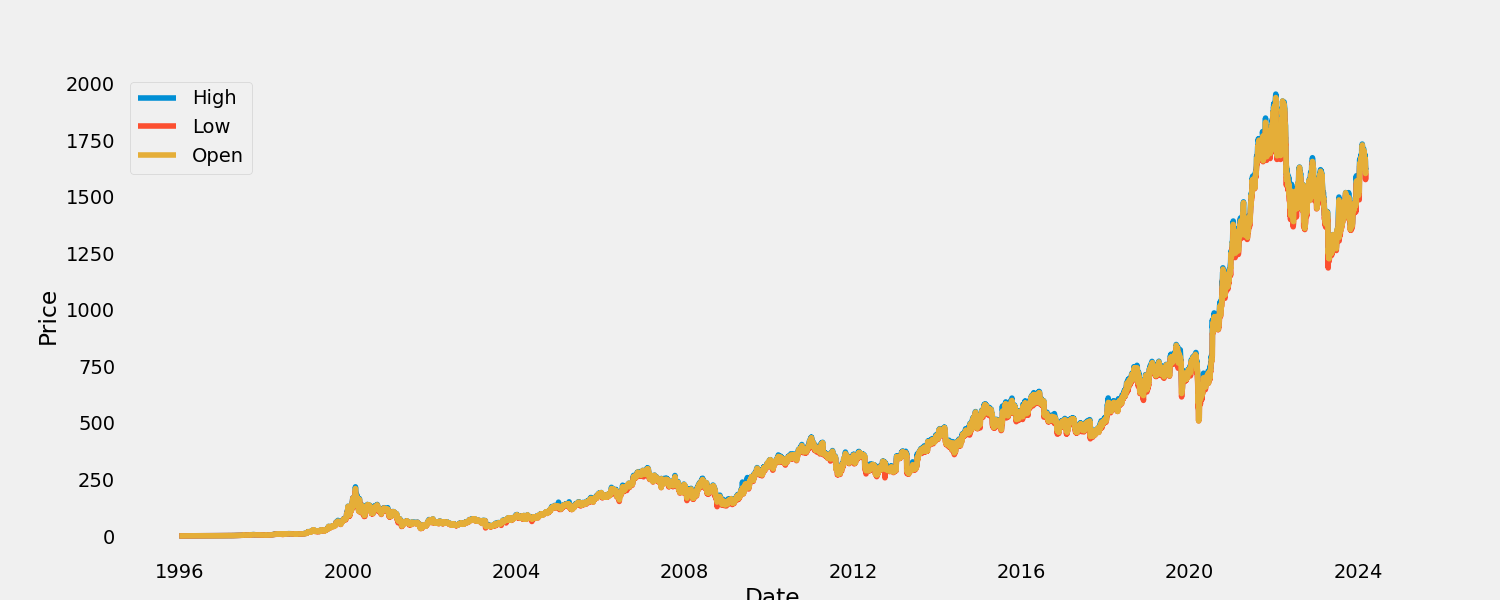

In [46]:
%matplotlib widget
plt.figure(figsize=(15,6))
plt.plot(df.High, label ='High')
plt.plot(df.Low, label ='Low')
plt.plot(df.Open, label ='Open')
# plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.legend()

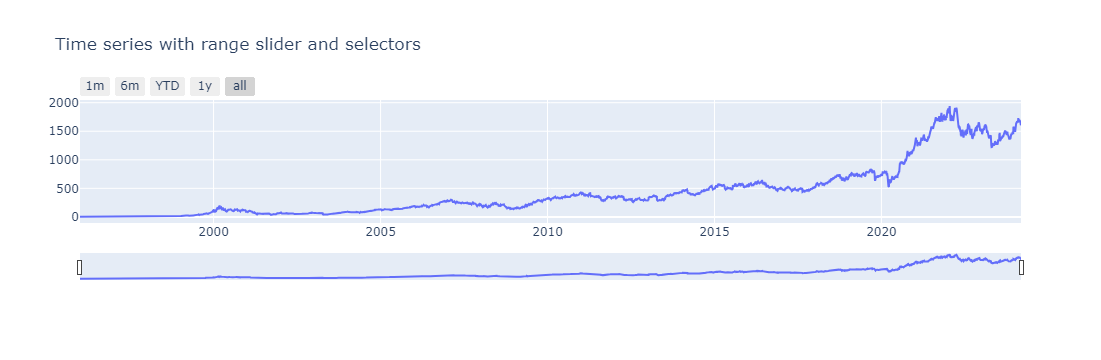

In [48]:
import plotly.graph_objects as go

# import pandas as pd

# Load data
# df = pd.read_csv(
    # "https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")
# df.columns = [col.replace("AAPL.", "") for col in df.columns]

# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(df.index), y=list(df.Close)))

# Set title
fig.update_layout(
    title_text="Time series with range slider and selectors"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

### Normalizing the terms

In [49]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0, 1))

In [50]:
import numpy as np

In [60]:
# cls = df.reset_index()["Close"]
close = np.array(df.Close).reshape(-1,1)
close

array([[7.96679000e-01],
       [7.93457000e-01],
       [7.98828000e-01],
       ...,
       [1.60650000e+03],
       [1.61755005e+03],
       [1.61644995e+03]])

In [61]:
scaledData = scalar.fit_transform(close)
# scaled_close = scaledData.transform(df.Close)

In [62]:
scaledData.std()

0.23560942023099726

In [63]:
scaledData

array([[1.72772290e-05],
       [1.56153222e-05],
       [1.83856827e-05],
       ...,
       [8.28238677e-01],
       [8.33938290e-01],
       [8.33370860e-01]])

### Creating the Dataset

In [64]:
def create_dataset(dataset, time_step=1):
    data_X, data_Y = [] , []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i: (i+time_step),0]
        data_X.append(a)
        data_Y.append(dataset[i+time_step, 0])
    return np.array(data_X) , np.array(data_Y)


In [65]:
time_step = 200
train_X , train_Y = create_dataset(scaledData, time_step)

In [66]:
train_X.shape, train_Y.shape

((6884, 200), (6884,))

In [67]:
print(train_X)

[[1.72772290e-05 1.56153222e-05 1.83856827e-05 ... 2.56136880e-04
  2.60921955e-04 2.53618230e-04]
 [1.56153222e-05 1.83856827e-05 1.56653547e-05 ... 2.60921955e-04
  2.53618230e-04 2.38053972e-04]
 [1.83856827e-05 1.56653547e-05 1.08297319e-05 ... 2.53618230e-04
  2.38053972e-04 2.43040724e-04]
 ...
 [6.48662976e-01 6.51732022e-01 6.42757093e-01 ... 8.61636712e-01
  8.63003594e-01 8.53100201e-01]
 [6.51732022e-01 6.42757093e-01 6.42292861e-01 ... 8.63003594e-01
  8.53100201e-01 8.44073705e-01]
 [6.42757093e-01 6.42292861e-01 6.54104688e-01 ... 8.53100201e-01
  8.44073705e-01 8.28238677e-01]]


### Reshaping the data which is required for LSTM

In [71]:
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)